# Import all the Dependencies

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

# initializing the CNN

CNN_Classifier=Sequential()

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,activation='relu'))

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

# flattening

CNN_Classifier.add(Flatten())

# step 4 Full connection

CNN_Classifier.add(Dense(units=128, activation='relu'))
CNN_Classifier.add(Dense(units=128, activation='sigmoid'))
 
#compiling the cnn()
CNN_Classifier.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Summary

In [14]:
CNN_Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

# Building and Compiling the Model

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\Grape\train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\Grape\test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

r=CNN_Classifier.fit(
        training_set,
        steps_per_epoch=len(training_set),
        epochs=50,
        validation_data=test_set,
        
        validation_steps=len(test_set))

Found 4062 images belonging to 4 classes.
Found 156 images belonging to 4 classes.
Epoch 1/50
127/127 [==============================] - 22s 170ms/step - loss: 0.0789 - accuracy: 0.9673 - val_loss: 0.1585 - val_accuracy: 0.9551
Epoch 2/50
127/127 [==============================] - 18s 141ms/step - loss: 0.0790 - accuracy: 0.9712 - val_loss: 0.1755 - val_accuracy: 0.9423
Epoch 3/50
127/127 [==============================] - 19s 148ms/step - loss: 0.0873 - accuracy: 0.9682 - val_loss: 0.1879 - val_accuracy: 0.9423
Epoch 4/50
127/127 [==============================] - 22s 171ms/step - loss: 0.0800 - accuracy: 0.9675 - val_loss: 0.1881 - val_accuracy: 0.9423
Epoch 5/50
127/127 [==============================] - 22s 177ms/step - loss: 0.0867 - accuracy: 0.9636 - val_loss: 0.1613 - val_accuracy: 0.9551
Epoch 6/50
127/127 [==============================] - 23s 177ms/step - loss: 0.0813 - accuracy: 0.9677 - val_loss: 0.4090 - val_accuracy: 0.8846
Epoch 7/50
127/127 [===========================

In [12]:
scores = CNN_Classifier.evaluate(test_set)

5/5 [==============================] - 0s 90ms/step - loss: 0.1092 - accuracy: 0.9615


# Saving Model

In [13]:
import os .path
if os.path.isfile(r'C:\Users\touheed\Documents\potato Model\grape_model.h5') is False:
    CNN_Classifier.save(r'C:\Users\touheed\Documents\potato Model\grape_model.h5')

# Plotting

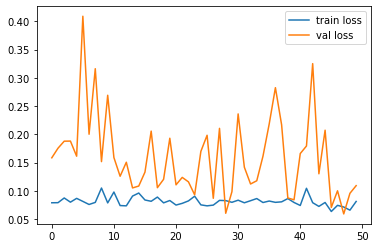

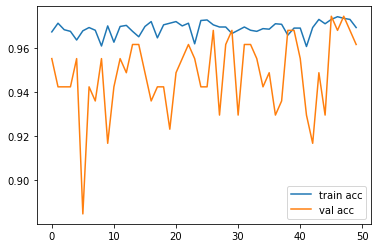

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Defining Classes

In [16]:
training_set.class_indices


{'Grape___Black_rot': 0,
 'Grape___Esca_(Black_Measles)': 1,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 2,
 'Grape___healthy': 3}

In [17]:
class_names = list(training_set.class_indices.keys())
class_names

['Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy']

In [18]:
count=0
for image_batch, label_batch in training_set:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.67234325 0.5676786  0.50101185]
  [0.7390023  0.63311994 0.5664533 ]
  [0.7540064  0.64812404 0.5814574 ]
  ...
  [0.8051078  0.72275484 0.6560882 ]
  [0.7842766  0.70192367 0.635257  ]
  [0.76141524 0.6813392  0.6169495 ]]

 [[0.6723496  0.5676836  0.5010169 ]
  [0.73903614 0.6331538  0.56648713]
  [0.75398505 0.6481027  0.58143604]
  ...
  [0.8051228  0.72276986 0.6561032 ]
  [0.78424275 0.7018898  0.63522315]
  [0.76145923 0.6813857  0.6169985 ]]

 [[0.67235583 0.56768864 0.5010219 ]
  [0.73907006 0.6331877  0.56652105]
  [0.7539637  0.6480813  0.58141464]
  ...
  [0.8051379  0.72278494 0.6561183 ]
  [0.78420883 0.7018559  0.6351892 ]
  [0.76150316 0.6814322  0.6170475 ]]

 ...

 [[0.73661256 0.66046315 0.5709095 ]
  [0.7458165  0.6673851  0.57326746]
  [0.7545979  0.67616653 0.5820489 ]
  ...
  [0.7660794  0.6994127  0.62098134]
  [0.8150813  0.74841464 0.66998327]
  [0.8280035  0.76133686 0.6829055 ]]

 [[0.7366176  0.66046566 0.570907  ]
  [0.74581903 0.66738766 0.57326996]


# Run prediction on a sample image

first image to predict
actual label: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
1/1 [==============================] - 0s 16ms/step
predicted label: Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


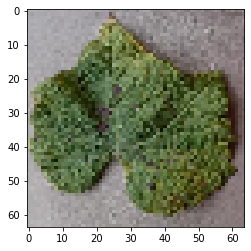

In [22]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = CNN_Classifier.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break